<a href="https://colab.research.google.com/github/mamesam1/Laboratorio1/blob/main/Reto_opcional_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** RETO (opcional): Implementación algoritmo de descenso de gradiente en problema con múltiples minínimos locales **
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   Nombre integrante 1
2.   Nombre integrante 2

**Número del grupo**

*Escribir el número del grupo*

Considere el problema de optimización:



> $\min_x f(x)$ sujeto a $x\in\mathbb{R}^3$

donde $f:\mathbb{R^3}→\mathbb{R}$ y $x=[x_1,x_2,x_3]^T$. Note que este es un problema de minmización sin restricciones en $\mathbb{R}^3$. Se sabe que la función es derivable y posee varios minimizadores locales entre los cuales hayun minimizador global, todos con posiciones desconocidas. El objetivo del presente laboratorio bono es implementar y utilizar el algoritmo de descenso de gradiente para identificar la mayor cantidad de candidatos a minimizadores locales dentro de una región dada e identificar el posible minimizador global. 

*   Implemente su propia rutina del algoritmo de descenso de gradiente teniendo en cuenta que los minimizadores de la función están definida por $x_i ∈ [-5, 5]$ para cada $i = 1, …, 3$. Es decir, cada componente de $x$ està entre $-5$ y $5$. Defina un tamaño del salto $\alpha$ y un parámetro de criterio de parada $ϵ$ que usted considere conveniente para resolver el problema. Estime el gradiente de la función evaluado en un punto de forma numérica (como se hizo en una práctica anterior), y bajo ninguna circunstancia utilice variables simbólicas.
   
*    Corra el algoritmo de descenso de gradiente al menos para 500 condiciones iniciales diferentes, y guarde las soluciones resultantes de cada corrida (ya sea definidas de forma aleatoria o haciendo un recorrido definido en la región donde se sabe están los minimizadores locales). Basados en estos resultados, realice una tabla donde incluya los valores aproximados de los candidatos a minimizadores locales (recuerden que cada candidato es un vector 3-dimensional), el candidato a minimizador global, y el respectivo número de iteraciones que el algoritmo de descenso de gradiente requirió para llegar a la respuesta.

\\

Esta actividad funciona como un bono para la nota del primer parcial de los integrantes del grupo. La nota se asignará dependiendo de el correcto seguimiento de las instrucciones anteriores y la cantidad de minimizadores locales reales que su algoritmo encuentre. Cada grupo debe desarrollar su propia solución y no se permitirá copia entre grupos de todo el curso. Una falta ante esto se reportará inmediatamente ante el comité de ética de la facultad. 



In [18]:
#@title Corra esta celda para cargar los datos del ejercicio
!pip install benchmark_functions
import benchmark_functions as bf
import numpy as np
import matplotlib.pyplot as plt

# func es el objeto creado con la funcion a minimizar
func = bf.StyblinskiTang(n_dimensions=3)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# Dado un punto x0, func permite evaluar la función objetivo en x0 
x0 = np.array([1.0, 1.0, 1.0]) 
f=func(x0)

#Algoritmo
def descensoGradiente(punto_inicial, epsilon, alpha, ite):
  x = punto_inicial
  for k in range(1, ite + 1):
    #Gradiente
    hx = np.array([x[0] + 0.1, x[1], x[2]])
    hy = np.array([x[0], x[1] + 0.1, x[2]])
    hz = np.array([x[0], x[1], x[2] + 0.1])

    gradx = (func(hx) - func(x))/0.1
    grady = (func(hy) - func(x))/0.1
    gradz = (func(hz) - func(x))/0.1
    grad = np.array([gradx, grady, gradz])
    #Dirección de movimiento
    direc = -alpha*grad   

    #Iteración
    x = np.add(x, direc)

    #Criterio de parada

    if np.linalg.norm(grad) <= epsilon:
      return x
      break

    elif k == ite and np.linalg.norm(grad) >= epsilon:
      return "No converge"


<ipython-input-46-d244bc2b766b>:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(minimizadorEncontrado != 'No converge'):


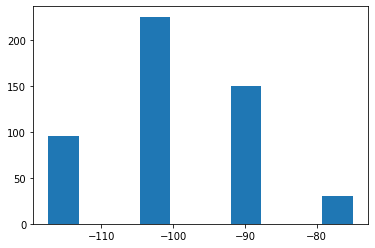

In [46]:
def minimoGlobal():

  #Los minimos que vayamos encontrando, los metemos a un array para compararlos luego
  minimosCandidatos = np.array([])
  minimizadoresCandidatos = np.array([])

  epsilon = 0.01
  alpha = 0.01
  ite = 100




  #Hacemos descenso de gradiente 5 veces con puntos iniciales diferentes
  for x in range(0,500,1):


    #Punto inicial ... x1i x2i x3i 
    X1i = float(np.random.randint(-5,5))
    X2i = float(np.random.randint(-5,5))
    X3i = float(np.random.randint(-5,5))
    
    puntoInicial = np.array([X1i,X2i,X3i])
  

    #Punto final ... x1f x2f x3f
    
    
    
    minimizadorEncontrado = descensoGradiente(puntoInicial, epsilon, alpha, ite)
    
    if(minimizadorEncontrado != 'No converge'):
      minimizadoresCandidatos  = np.append(minimizadoresCandidatos, minimizadorEncontrado)
      minimosCandidatos = np.append(minimosCandidatos, func(minimizadorEncontrado)) 

  #print(minimosCandidatos)

  
  
  
  plt.hist(minimosCandidatos)
  
  
  



  
minimoGlobal()



